In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import glob
import os
import random
import re
import datatable as dt
from scipy.interpolate import make_interp_spline, BSpline
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/opt/ml/code/input/train.csv")
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780502 entries, 0 to 780501
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order_id     780502 non-null  object 
 1   product_id   780502 non-null  object 
 2   description  780502 non-null  object 
 3   quantity     780502 non-null  int64  
 4   order_date   780502 non-null  object 
 5   price        780502 non-null  float64
 6   customer_id  780502 non-null  int64  
 7   country      780502 non-null  object 
 8   total        780502 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 53.6+ MB
None


In [3]:
manual_data = data[data['product_id'] == 'M']
print(manual_data)
print(manual_data.describe())

       order_id product_id description  quantity        order_date      price  \
2121    C489651          M      Manual        -1   2009.12.1 16:48     8.4150   
6692    C490126          M      Manual        -1   2009.12.3 18:12     9.8175   
6739    C490129          M      Manual        -1   2009.12.3 18:26  3297.5085   
8150     490300          M      Manual         1   2009.12.4 14:19     1.4025   
8151     490300          M      Manual         1   2009.12.4 14:19     0.3465   
...         ...        ...         ...       ...               ...        ...   
769513   578757          M      Manual         2  2011.11.25 11:41     1.4025   
771715   578941          M      Manual         6  2011.11.27 13:26     0.6435   
771728   578941          M      Manual        14  2011.11.27 13:26     0.3465   
772585   578996          M      Manual         1  2011.11.27 16:02     1.6500   
779731   579711          M      Manual         1  2011.11.30 14:17     2.0625   

        customer_id        

-1350    1
-600     1
-480     1
-408     1
-200     1
        ..
 288     1
 456     1
 832     1
 1200    1
 1600    1
Name: quantity, Length: 76, dtype: int64


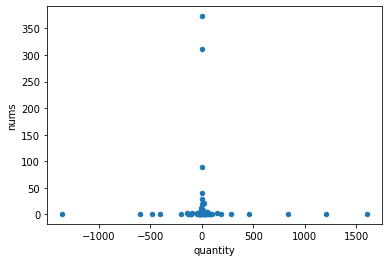

In [4]:
manual_quantity = manual_data['quantity'].value_counts().sort_index()
print(manual_quantity)

# 인덱스 가져오기
# print(manual_quantity.index)

# variable 확인을 위해 인덱스(quantity)를 값으로 추가해줌 -> 없으면 음수 quantity 안나옴
add_col1 = list(manual_quantity.index)
add_col2 = manual_quantity.values

m_quantity_check = pd.DataFrame()
m_quantity_check['quantity'] = add_col1
m_quantity_check['nums'] = add_col2

# plot 출력
m_quantity_check.plot.scatter(x="quantity", y="nums")



,total,nums
count,641.000000,641.000000
mean,-421.649031,1.670827
std,3873.365668,2.193579
min,-64300.500000,1.000000
25%,-268.290000,1.000000
50%,-3.465000,1.000000
75%,25.245000,1.000000
max,18073.275000,22.000000


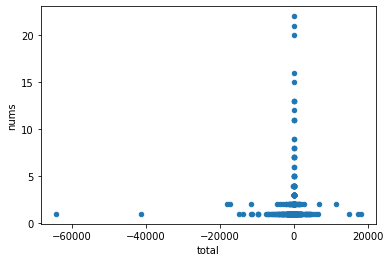

In [9]:
manual_total = manual_data['total'].value_counts().sort_index()

# 인덱스 가져오기
# print(manual_quantity.index)

# variable 확인을 위해 인덱스(quantity)를 값으로 추가해줌 -> 없으면 음수 quantity 안나옴
add_col1 = list(manual_total.index)
add_col2 = manual_total.values

m_total_check = pd.DataFrame()
m_total_check['total'] = add_col1
m_total_check['nums'] = add_col2

# plot 출력
m_total_check.plot.scatter(x="total", y="nums")

m_total_check.describe()

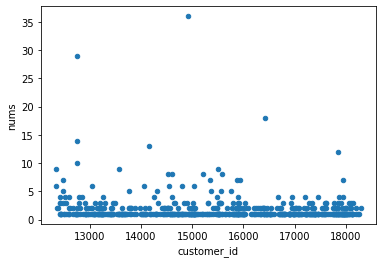

In [6]:
manual_customer_id = manual_data['customer_id'].value_counts().sort_index()

# 인덱스 가져오기
# print(manual_quantity.index)

# variable 확인을 위해 인덱스(quantity)를 값으로 추가해줌 -> 없으면 음수 quantity 안나옴
add_col1 = list(manual_customer_id.index)
add_col2 = manual_customer_id.values

m_customer_id_check = pd.DataFrame()
m_customer_id_check['customer_id'] = add_col1
m_customer_id_check['nums'] = add_col2

# plot 출력
m_customer_id_check.plot.scatter(x="customer_id", y="nums")



In [7]:
# manual_data
# data
# m_()_check

In [8]:
len(data[data['customer_id']==12748])

6369

1071
391
          quantity         price   customer_id         total
count  1071.000000   1071.000000   1071.000000   1071.000000
mean      3.071895    732.811434  15235.350140   -286.144756
std      86.115514   3058.573489   1764.857979   3154.123049
min   -1350.000000      0.000000  12346.000000 -64300.500000
25%      -1.000000      1.650000  13653.500000    -40.095000
50%       1.000000      8.250000  15202.000000      2.722500
75%       2.000000    344.000250  16744.000000     16.689750
max    1600.000000  64300.500000  18283.000000  18073.275000


<<양수값을 가지는 메뉴얼에 대한 describe>>
          quantity         price   customer_id         total
count   673.000000    673.000000    673.000000    673.000000
mean     12.726597    358.037717  15411.787519    371.040551
std      86.734146   1501.538780   1753.810357   1500.463610
min       1.000000      0.099000  12352.000000      0.132000
25%       1.000000      1.188000  14046.000000      3.762000
50%       1.000000      3.217500  15514.0000

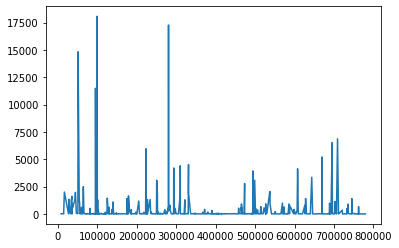

In [63]:
print(len(manual_data))
print(len(manual_data[manual_data['total'] < 0]))
print(manual_data.describe())

print('\n\n<<양수값을 가지는 메뉴얼에 대한 describe>>')
print(manual_data[manual_data['total'] > 0].describe())

tmp_df = df.DataFrame()
tmp_df['total'] = manual_data[manual_data['total'] > 0]['total']


1071


<<양수값을 가지는 메뉴얼에 대한 describe>>
<bound method NDFrame.describe of 598101        0.1320
152527        0.1650
762021        0.2640
340054        0.3465
8151          0.3465
             ...    
95454     11480.9805
95370     11480.9805
51409     14826.2400
280603    17273.5200
99582     18073.2750
Name: total, Length: 673, dtype: float64>


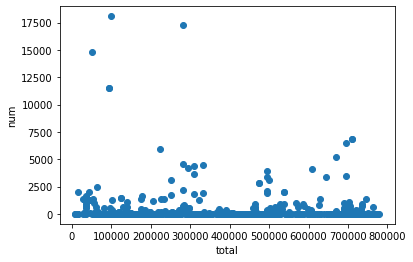

In [57]:
# print(len(manual_data))
# plus_manual_data = manual_data[manual_data['total'] > 0]

# print('\n\n<<양수값을 가지는 메뉴얼에 대한 describe>>')
# s = plus_manual_data.sort_values(by=['total'], axis=0)['total']#.plot.scatter(x=, y='total')
# print(s.describe)

# plt.scatter(s.index, s)
# plt.xlabel('total')
# plt.ylabel('num')
# plt.show()